In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# import random
# install squarify on the file location where you're using the python.exe interpretor 
#   else, it won't work. 
import squarify
# import sklearn as sk
# from sklearn import datasets, linear_model

In [24]:
data = pd.read_csv("report.csv", delimiter=',')
data

,Layers,Activation,Average Score,Average Accuracy
0,16-32-64-16,si16-si32-si64-si16,18.6,0.941923
1,16-32-64-16,re16-re32-re64-re16,40.2,0.994693
2,16-32-64-16,el16-el32-el64-el16,20.4,0.994028
3,16-32-64-16,re16-si32-re64-si16,36.0,0.988430
4,16-32-64-16,re16-re32-si64-si16,29.4,0.990971
...,...,...,...,...
58,16-8,el16-re8,34.4,0.979446
59,16-8,so16-re8,49.8,0.981306
60,16-8,re16-so8,25.2,0.981698
61,16-8,so16-el8,32.8,0.982126


In [25]:
sortedDFrame = pd.DataFrame(data.sort_values(by='Average Score'))

In [26]:
# forcefully creating index for the new dataframe
num = []
for i in range(0,sortedDFrame.shape[0]):
    num.append(i)
sortedDFrame['index'] = num 

In [37]:
cols = sortedDFrame.shape[1]  # update number of cols

# Get a list of all the column variable names
col_vars = sortedDFrame.columns.tolist()

# Rearrange variable name list
col_vars = col_vars[-1:] + col_vars[:-1]

# Rearrange the data frame
sortedDFrame = sortedDFrame[col_vars]


sortedDFrame

,Average Accuracy,index,Layers,Activation,Average Score
38,0.974226,0,8-16,el8-si16,7.8
44,0.969475,1,8-16,re8-so16,14.2
40,0.976634,2,8-16,so8-si16,18.4
0,0.941923,3,16-32-64-16,si16-si32-si64-si16,18.6
34,0.942615,4,8-16,so8-so16,19.4
...,...,...,...,...,...
12,0.996264,58,16-32-64-16,re16-re32-el64-el16,44.0
57,0.994485,59,16-8,re16-el8,47.2
36,0.986348,60,8-16,re8-si16,48.4
31,0.974482,61,8-16,si8-si16,49.4


In [45]:
X = sortedDFrame['index'].to_numpy()
Y = sortedDFrame['Average Score'].to_numpy()
labels_b = sortedDFrame['Activation'].to_numpy()

In [46]:
# assigning default colors for the bar chart
colors_b = []
for score in labels_b:
    if score.count('-') > 1:
        colors_b.append('lightblue')
    else:
        colors_b.append('lightgreen')

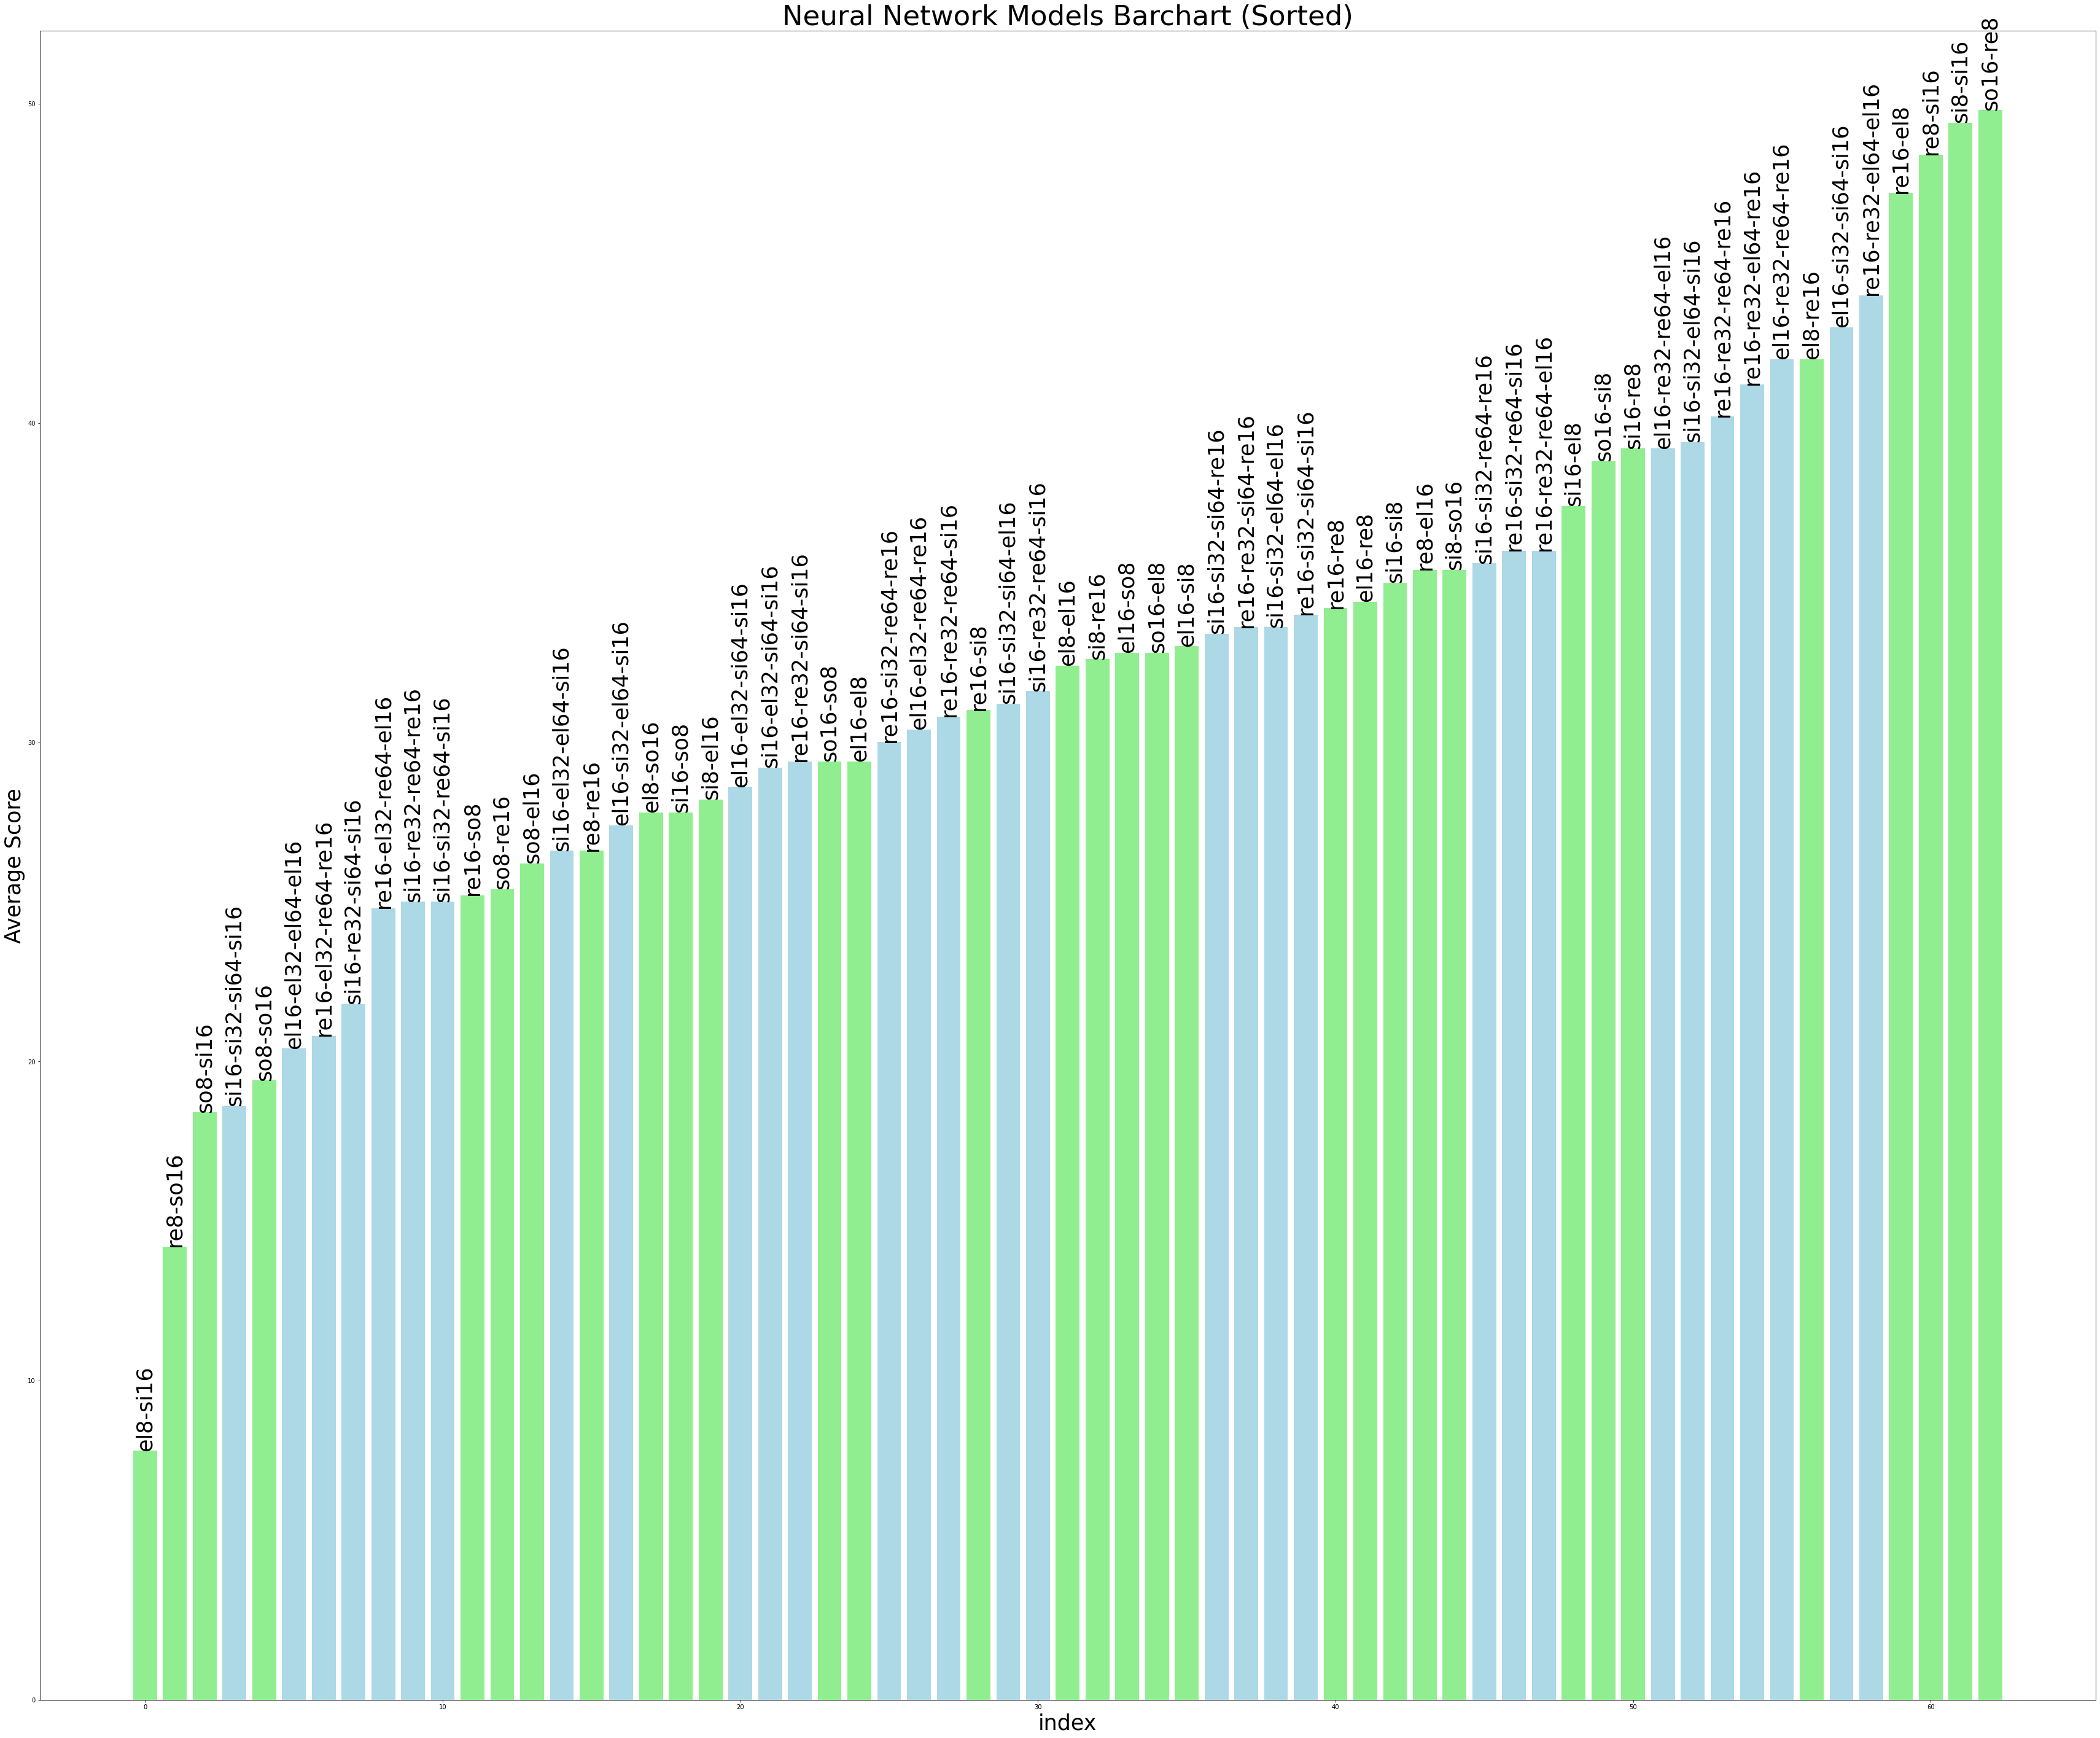

In [47]:
# Bar chart (idk if we're using this - its too much info for one plot)
# initialize size of the figure
plt.figure(figsize=(60,50))
# plots the bar chart
plt.bar(X,Y, color = colors_b)
# initializing x and y labels
plt.xlabel('index', fontsize = 35)
plt.ylabel('Average Score', fontsize = 35)
# title for the plot
plt.title("Neural Network Models Barchart (Sorted)", fontsize = 45)
# create annotations (labels) for each graph (re-el,so-re,.. and so on)
for i, label in enumerate(labels_b):
    plt.annotate(label,(X[i],Y[i]), fontsize = 35, rotation=90, ha='center', va='bottom' )
# saves figure
plt.savefig("./saved-plots/activationsConfig.jpg",bbox_inches='tight')
# shows plot
plt.show()

In [51]:
# generating labels for the treemap
labels_tm = []
for index,avgScore in enumerate(Y):
    # print(labels_b[index], avgScore)
    labels_tm.append(labels_b[index] + '\n' + str(avgScore))

labels_tm

['el8-si16\n7.8',
 're8-so16\n14.2',
 'so8-si16\n18.4',
 'si16-si32-si64-si16\n18.6',
 'so8-so16\n19.4',
 'el16-el32-el64-el16\n20.4',
 're16-el32-re64-re16\n20.8',
 'si16-re32-si64-si16\n21.8',
 're16-el32-re64-el16\n24.8',
 'si16-re32-re64-re16\n25.0',
 'si16-si32-re64-si16\n25.0',
 're16-so8\n25.2',
 'so8-re16\n25.4',
 'so8-el16\n26.2',
 'si16-el32-el64-si16\n26.6',
 're8-re16\n26.6',
 'el16-si32-el64-si16\n27.4',
 'el8-so16\n27.8',
 'si16-so8\n27.8',
 'si8-el16\n28.2',
 'el16-el32-si64-si16\n28.6',
 'si16-el32-si64-si16\n29.2',
 're16-re32-si64-si16\n29.4',
 'so16-so8\n29.4',
 'el16-el8\n29.4',
 're16-si32-re64-re16\n30.0',
 'el16-el32-re64-re16\n30.4',
 're16-re32-re64-si16\n30.8',
 're16-si8\n31.0',
 'si16-si32-si64-el16\n31.2',
 'si16-re32-re64-si16\n31.6',
 'el8-el16\n32.4',
 'si8-re16\n32.6',
 'el16-so8\n32.8',
 'so16-el8\n32.8',
 'el16-si8\n33.0',
 'si16-si32-si64-re16\n33.4',
 're16-re32-si64-re16\n33.6',
 'si16-si32-el64-el16\n33.6',
 're16-si32-si64-si16\n34.0',
 're16-re8

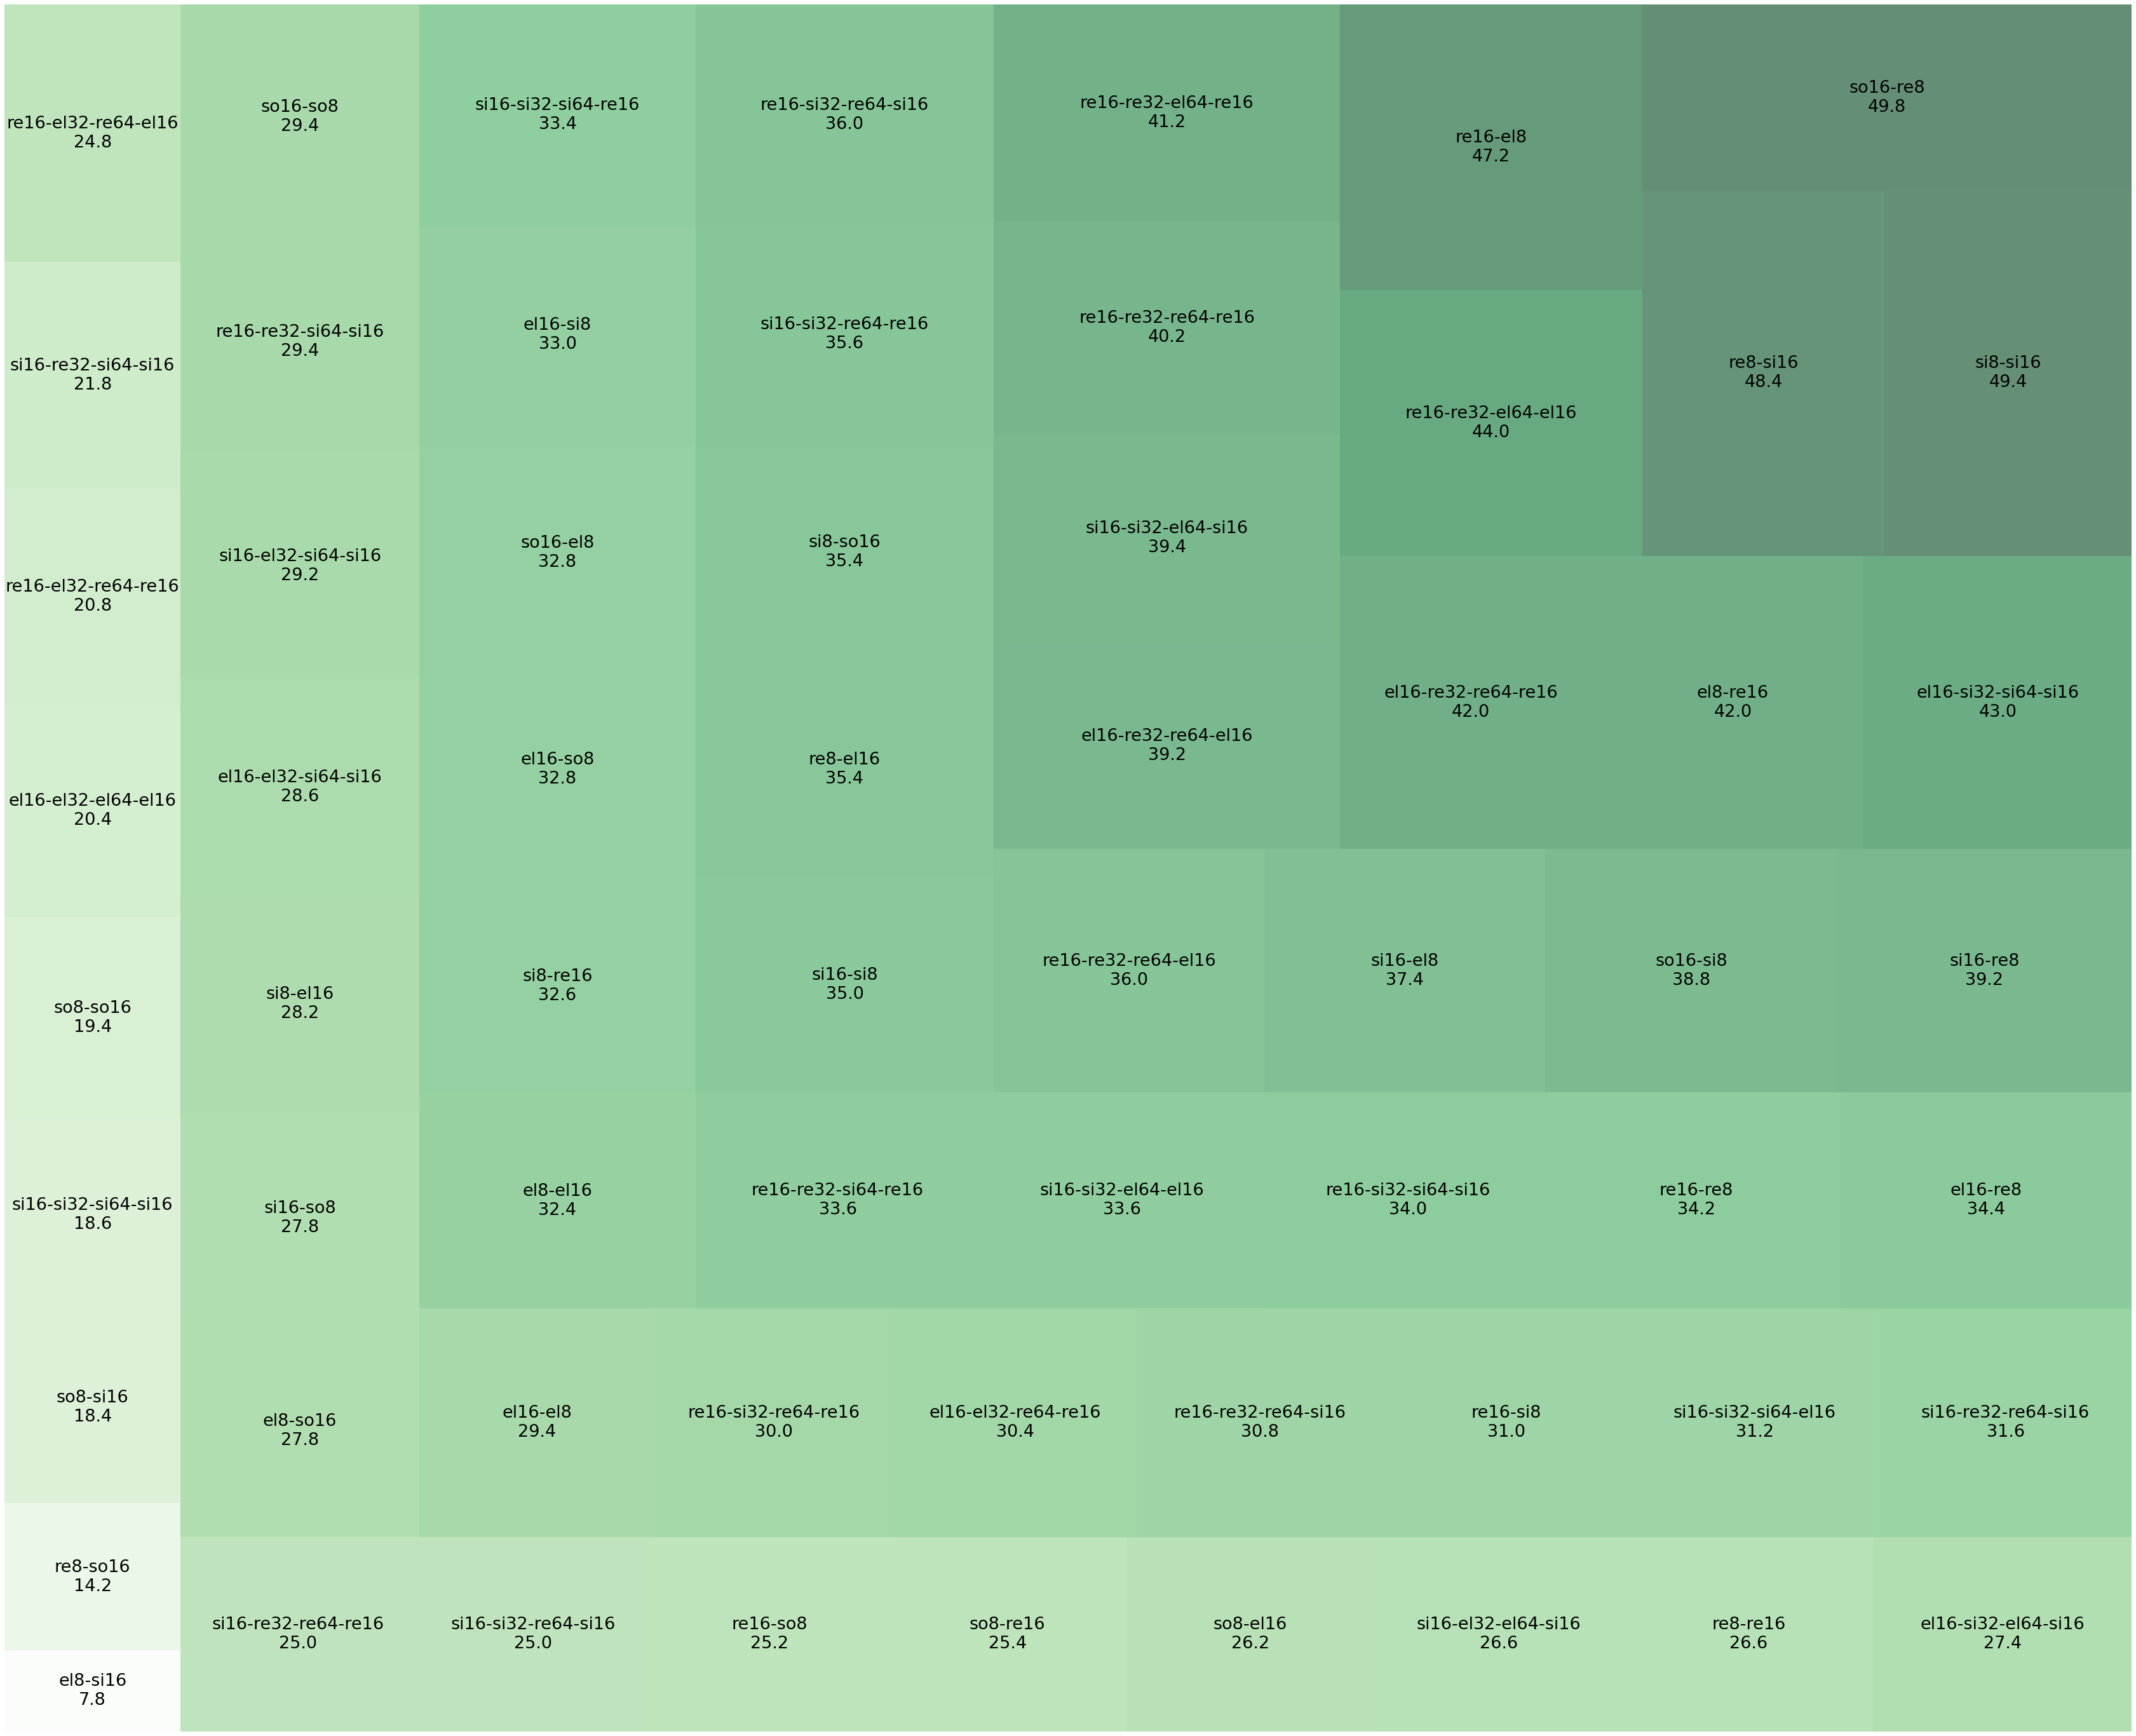

In [52]:
# Code to Plot TREEMAP

# normalizing the colors to use for the treemap
norm = matplotlib.colors.Normalize(vmin=min(Y), vmax=max(Y))
colors_tm = [matplotlib.cm.Greens(norm(value)) for value in Y]
# initialize size of the figure
plt.figure(figsize=(60,50))
# plots the treemap using the squarify package
squarify.plot(sizes=sortedDFrame['Average Score'], label=labels_tm, alpha=0.6, color=colors_tm, text_kwargs={'fontsize':27})
# turning the axis of the plot off as default
plt.axis('off')
# saves the figure
plt.savefig('./saved-plots/activationConfigtm.jpg',bbox_inches='tight')
# displays
plt.show()